In [13]:
import numpy as np
import h5py
import cv2
import os, sys
import scipy.io as sio
from copy import deepcopy
from core.get_args import get_args
from core.produce_denoised_img import produce_denoised_img
import matplotlib.pyplot as plt
from core.watershed import watershed,watershed_original,watershed_per_img
from scipy.ndimage import median_filter
from skimage.metrics import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
result_filename = "../result_data/221209_FBI_Net_Grayscale_Samsung_SET7_MSE_Affine_layers_x17_filters_x64_cropsize_256_result"
denoised_images = result_data = sio.loadmat(result_filename)['denoised_img']
with h5py.File("../data/val_Samsung_SNU_patches_SET7.hdf5",'r') as f :
    noisy_images = np.array(f['noisy_images'])
    clean_images = np.array(f['clean_images'])

In [5]:
clean_images.shape

(3000, 256, 256)

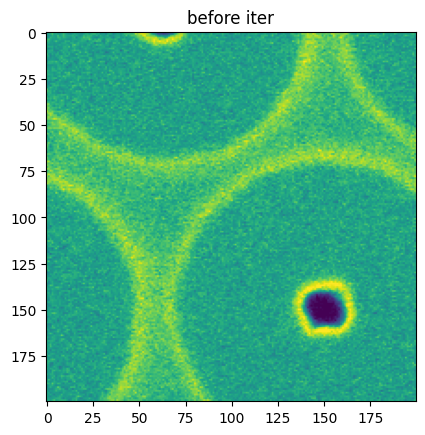

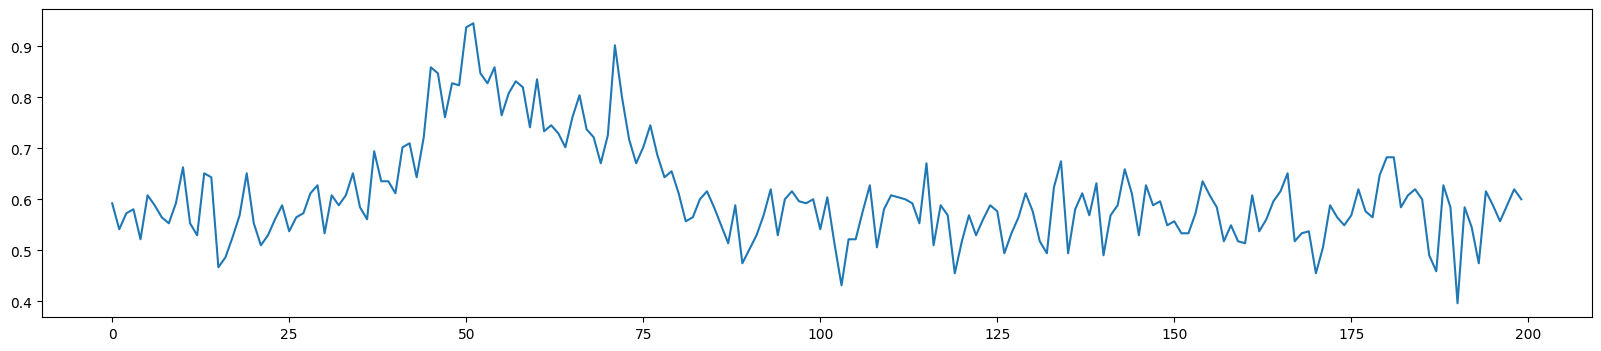

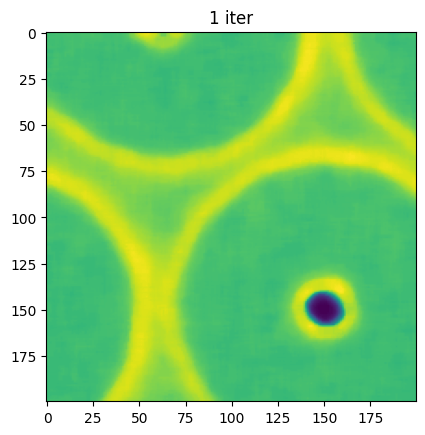

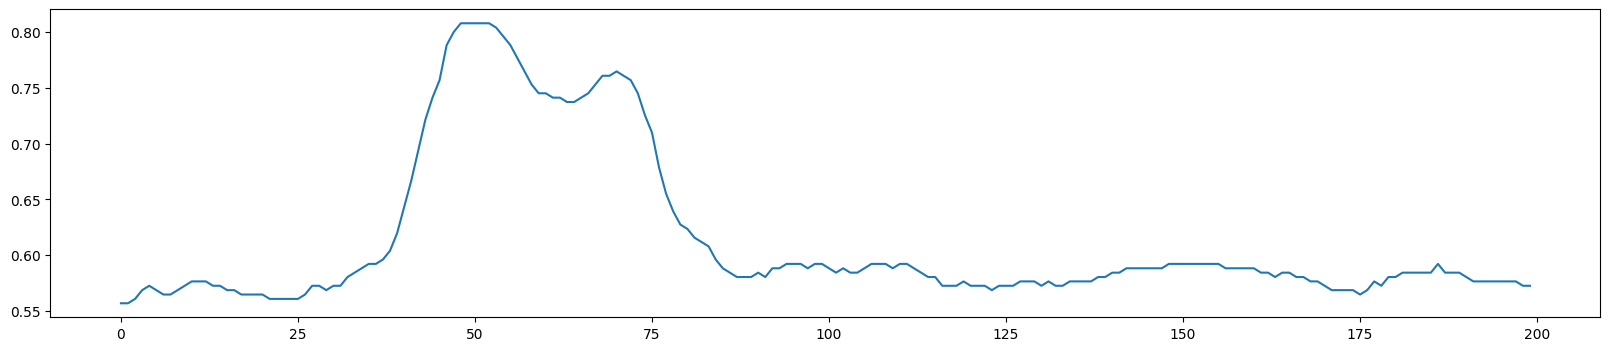

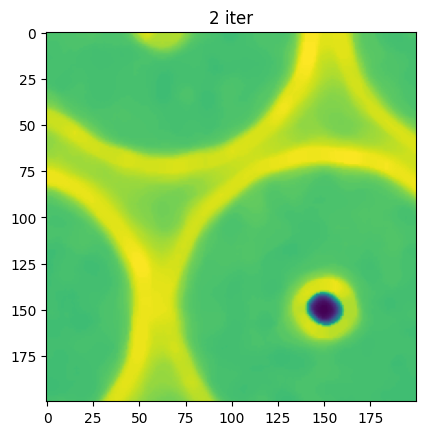

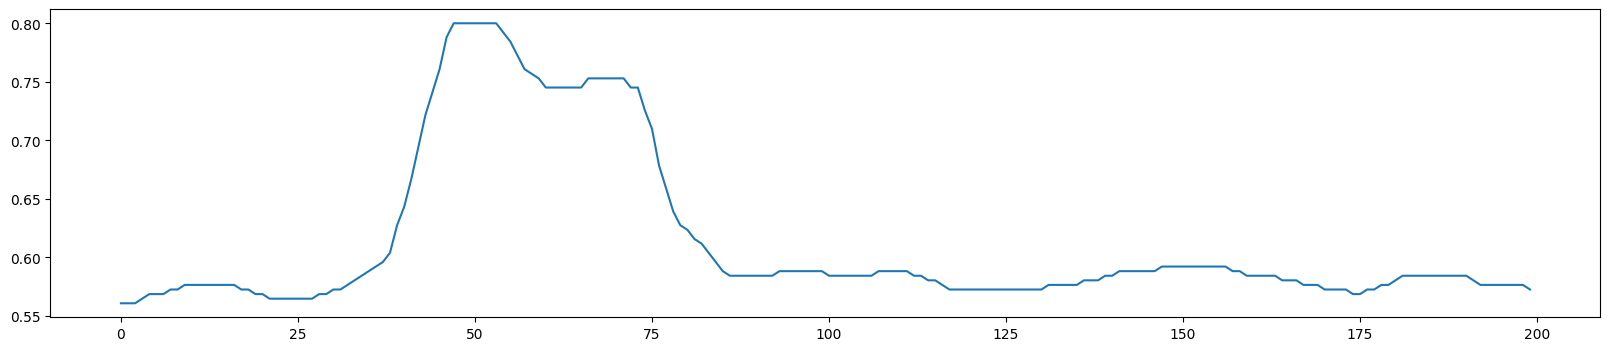

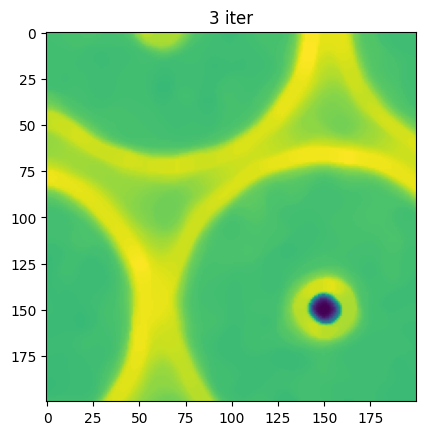

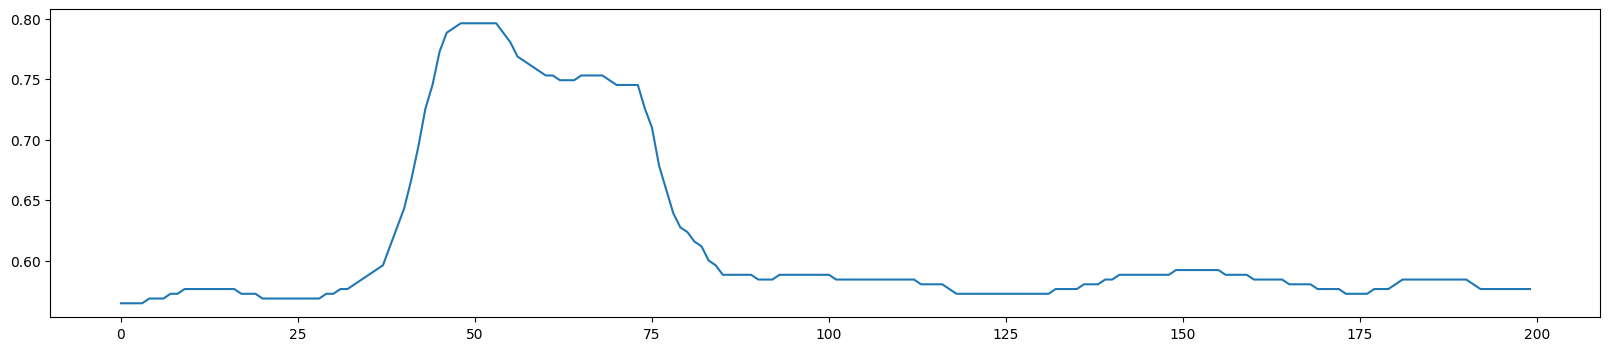

In [10]:

index = 2500 # 0 : F1, 500 : F2, 1000 : F4, 1500 : F8, 2000 : F16, 2500 : F32

noisy_img = noisy_images[index]
clean_img = clean_images[index]
denoised_img = denoised_images[index]
figure_on = False
h_line = 125
m_filter_out = deepcopy(noisy_img)
if figure_on is True:
    plt.title(f'before iter')
    plt.imshow(m_filter_out[:200,:200])
    plt.axhline(h_line,color='r')
    plt.pause(0.01)
    plt.figure(figsize=(20,4))
    plt.plot(m_filter_out[125][:200])
    plt.pause(0.01)
for i in range(3):
    m_filter_out = median_filter(m_filter_out,(11,11))
    if figure_on is True:
        plt.title(f'{i+1} iter')
        plt.imshow(m_filter_out[:200,:200])
        plt.axhline(h_line,color='r')
        plt.pause(0.01)
        plt.figure(figsize=(20,4))
        plt.plot(m_filter_out[125][:200])
        plt.pause(0.01)
print(f"Before denoising SSIM : {structural_similarity(clean_img, noisy_img):.5f}")
print(f"Before denoising PSNR : {peak_signal_noise_ratio(clean_img, noisy_img):.5f}")
print(f"After  denoising SSIM (with median filter) : {structural_similarity(clean_img, m_filter_out):.5f}")
print(f"After  denoising PSNR (with median filter) : {peak_signal_noise_ratio(clean_img, m_filter_out):.5f}")
print(f"After  denoising SSIM (with MSE) \t   : {structural_similarity(clean_img, denoised_img):.5f}")
print(f"After  denoising PSNR (with MSE) \t   : {peak_signal_noise_ratio(clean_img, denoised_img):.5f}")


In [22]:
raw_metric= {'PSNR' : [], 'SSIM' : [], 'whole_PSNR' : [],'whole_SSIM' : []}
mfilter_metric = {'PSNR' : [], 'SSIM' : [], 'whole_PSNR' : [],'whole_SSIM' : []}
MSE_metric = {'PSNR' : [], 'SSIM' : [], 'whole_PSNR' : [],'whole_SSIM' : []}

for index in range(3000):
    noisy_img = noisy_images[index]
    clean_img = clean_images[index]
    raw_metric['PSNR'].append(peak_signal_noise_ratio(clean_img, noisy_img))
    raw_metric['SSIM'].append(structural_similarity(clean_img, noisy_img))
    denoised_img = denoised_images[index]
    MSE_metric['PSNR'].append(peak_signal_noise_ratio(clean_img, denoised_img))
    MSE_metric['SSIM'].append(structural_similarity(clean_img, denoised_img))
    
    m_filter_out = deepcopy(noisy_img)
    # apply median filter 3 times
    for i in range(3):
        m_filter_out = median_filter(m_filter_out,(11,11))
    mfilter_metric['PSNR'].append(peak_signal_noise_ratio(clean_img, m_filter_out))
    mfilter_metric['SSIM'].append(structural_similarity(clean_img, m_filter_out))
    
    if index % 500 == 499 and index != 0:
        print(f"index : F{2**((index)//500)}")
        print(f"Before denoising SSIM \t \t\t   : {np.mean(raw_metric['SSIM']):.5f}")
        print(f"Before denoising PSNR \t \t\t   : {np.mean(raw_metric['PSNR']):.5f}")
        print(f"After  denoising SSIM (with median filter) : {np.mean(mfilter_metric['SSIM']):.5f}")
        print(f"After  denoising PSNR (with median filter) : {np.mean(mfilter_metric['PSNR']):.5f}")
        print(f"After  denoising SSIM (with MSE) \t   : {np.mean(MSE_metric['SSIM']):.5f}")
        print(f"After  denoising PSNR (with MSE) \t   : {np.mean(MSE_metric['PSNR']):.5f}")

        raw_metric['whole_PSNR'].append(np.mean(raw_metric['PSNR']))
        raw_metric['PSNR'] = []
        raw_metric['whole_SSIM'].append(np.mean(raw_metric['SSIM']))
        raw_metric['SSIM'] = []
        
        MSE_metric['whole_PSNR'].append(np.mean(MSE_metric['PSNR']))
        MSE_metric['PSNR'] = []
        MSE_metric['whole_SSIM'].append(np.mean(MSE_metric['SSIM']))
        MSE_metric['SSIM'] = []
        
        mfilter_metric['whole_PSNR'].append(np.mean(mfilter_metric['PSNR']))
        mfilter_metric['PSNR'] = []
        mfilter_metric['whole_SSIM'].append(np.mean(mfilter_metric['SSIM']))
        mfilter_metric['SSIM'] = []

index : F2
Before denoising SSIM : 0.09030
Before denoising PSNR : 12.39319
After  denoising SSIM (with median filter) : 0.66749
After  denoising PSNR (with median filter) : 21.22467
After  denoising SSIM (with MSE) 	   : 0.72676
After  denoising PSNR (with MSE) 	   : 26.89819
index : F4
Before denoising SSIM : 0.14294
Before denoising PSNR : 14.17431
After  denoising SSIM (with median filter) : 0.66508
After  denoising PSNR (with median filter) : 19.80178
After  denoising SSIM (with MSE) 	   : 0.72546
After  denoising PSNR (with MSE) 	   : 27.04567
index : F8
Before denoising SSIM : 0.21285
Before denoising PSNR : 16.06854
After  denoising SSIM (with median filter) : 0.67216
After  denoising PSNR (with median filter) : 20.39123
After  denoising SSIM (with MSE) 	   : 0.72874
After  denoising PSNR (with MSE) 	   : 27.29764
index : F16
Before denoising SSIM : 0.30277
Before denoising PSNR : 18.56307
After  denoising SSIM (with median filter) : 0.68078
After  denoising PSNR (with median f

In [26]:
        print(f"Before denoising SSIM \t \t\t   : {np.mean(raw_metric['whole_SSIM']):.5f}")
        print(f"Before denoising PSNR \t \t\t   : {np.mean(raw_metric['whole_PSNR']):.5f}")
        print(f"After  denoising SSIM (with median filter) : {np.mean(mfilter_metric['whole_SSIM']):.5f}")
        print(f"After  denoising PSNR (with median filter) : {np.mean(mfilter_metric['whole_PSNR']):.5f}")
        print(f"After  denoising SSIM (with MSE) \t   : {np.mean(MSE_metric['whole_SSIM']):.5f}")
        print(f"After  denoising PSNR (with MSE) \t   : {np.mean(MSE_metric['whole_PSNR']):.5f}")

Before denoising SSIM 	 		   : 0.27779
Before denoising PSNR 	 		   : 17.56798
After  denoising SSIM (with median filter) : 0.67771
After  denoising PSNR (with median filter) : 22.12323
After  denoising SSIM (with MSE) 	   : 0.72905
After  denoising PSNR (with MSE) 	   : 27.21991


## Denoiser with individual Fnumber
### Ex) train only with F1-F32 pairs

In [39]:
x_f_num = 'F8' #'F32'
y_f_num = 'F16' #F64'
result_filename = f"../result_data/221025_FBI_Net_Grayscale_Samsung_SET1_x_as_{x_f_num}_y_as_{y_f_num}_MSE_Affine_layers_x17_filters_x64_cropsize_256_result"
denoised_images = result_data = sio.loadmat(result_filename)['denoised_img']
with h5py.File("../data/val_Samsung_SNU_patches_SET1_divided_by_fnum.hdf5",'r') as f :
    noisy_images = np.array(f[x_f_num])
    clean_images = np.array(f[y_f_num])

In [40]:
noisy_images.shape

(500, 256, 256)

In [ ]:
raw_metric= {'PSNR' : [], 'SSIM' : [], 'whole_PSNR' : [],'whole_SSIM' : []}
mfilter_metric = {'PSNR' : [], 'SSIM' : [], 'whole_PSNR' : [],'whole_SSIM' : []}
MSE_metric = {'PSNR' : [], 'SSIM' : [], 'whole_PSNR' : [],'whole_SSIM' : []}

for index in range(noisy_images.shape[0]):
    noisy_img = noisy_images[index]
    clean_img = clean_images[index]
    raw_metric['PSNR'].append(peak_signal_noise_ratio(clean_img, noisy_img))
    raw_metric['SSIM'].append(structural_similarity(clean_img, noisy_img))
    denoised_img = denoised_images[index]
    MSE_metric['PSNR'].append(peak_signal_noise_ratio(clean_img, denoised_img))
    MSE_metric['SSIM'].append(structural_similarity(clean_img, denoised_img))
    
    m_filter_out = deepcopy(noisy_img)
    # apply median filter 3 times
    for i in range(3):
        m_filter_out = median_filter(m_filter_out,(11,11))
    mfilter_metric['PSNR'].append(peak_signal_noise_ratio(clean_img, m_filter_out))
    mfilter_metric['SSIM'].append(structural_similarity(clean_img, m_filter_out))

    if index % 500 == 499 and index != 0:
        print(f"index : {x_f_num}")
        print(f"Before denoising SSIM \t \t\t   : {np.mean(raw_metric['SSIM']):.5f}")
        print(f"Before denoising PSNR \t \t\t   : {np.mean(raw_metric['PSNR']):.5f}")
        print(f"After  denoising SSIM (with median filter) : {np.mean(mfilter_metric['SSIM']):.5f}")
        print(f"After  denoising PSNR (with median filter) : {np.mean(mfilter_metric['PSNR']):.5f}")
        print(f"After  denoising SSIM (with MSE) \t   : {np.mean(MSE_metric['SSIM']):.5f}")
        print(f"After  denoising PSNR (with MSE) \t   : {np.mean(MSE_metric['PSNR']):.5f}")

        raw_metric['whole_PSNR'].append(np.mean(raw_metric['PSNR']))
        raw_metric['PSNR'] = []
        raw_metric['whole_SSIM'].append(np.mean(raw_metric['SSIM']))
        raw_metric['SSIM'] = []
        
        MSE_metric['whole_PSNR'].append(np.mean(MSE_metric['PSNR']))
        MSE_metric['PSNR'] = []
        MSE_metric['whole_SSIM'].append(np.mean(MSE_metric['SSIM']))
        MSE_metric['SSIM'] = []
        
        mfilter_metric['whole_PSNR'].append(np.mean(mfilter_metric['PSNR']))
        mfilter_metric['PSNR'] = []
        mfilter_metric['whole_SSIM'].append(np.mean(mfilter_metric['SSIM']))
        mfilter_metric['SSIM'] = []